In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tools import *
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 140

PARTIE 1 :

1/ Lire l’image flower.jpg en niveau de gris via cv2

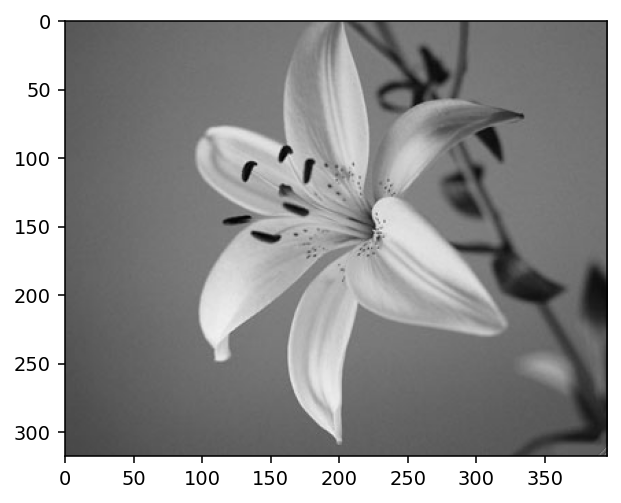

In [56]:
im_gray = cv2.imread('./figs/flower.png', cv2.IMREAD_COLOR)
# im_gray = cv2.imread('/content/drive/MyDrive/CoursBTI/figs/flower.png', 0)
plt.imshow(im_gray)

In [57]:
im_gray.shape

(318, 396, 3)

In [ ]:
# # Reshape the grayscale image to have a third dimension
# im_gray= im_gray.reshape(im_gray.shape[0], im_gray.shape[1], 1)

In [58]:
# # Define the size of the matrix
# sizes = [3,7,11]
# images=[]
# for size in sizes:

#     # Calculate the value of each element
#     value = 1 / (size * size)

#     # Create the matrix
#     kernel = [[value for j in range(size)] for i in range(size)]

#     img_moy=apply_filter_to_image(im_gray,kernel)
#     images.append(img_moy)

In [59]:
# img_moy.shape

In [60]:
# num_images = len(images)

# # create a square grid of subplots, with enough rows and columns to fit all the images
# num_cols = int(num_images**0.5)
# num_rows = (num_images + num_cols - 1) // num_cols
# fig, axes = plt.subplots(num_rows, num_cols)

# # loop through the images and add each one to a subplot
# for i, ax in enumerate(axes.flat):
#     if i < num_images:
#         ax.imshow(images[i])
#         ax.axis('off')
#     else:
#         ax.axis('off')

# plt.show()

In [77]:
# kernel_sizes = [3, 7, 11]

# padding_sizes = [k // 2 for k in kernel_sizes]
# filtered_images = []
# for kernel_size, padding_size in zip(kernel_sizes, padding_sizes):
#     padded_img = np.pad(im_gray, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='constant')
#     kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
#     filtered_img = np.zeros_like(im_gray)
#     for i in range(3):
#         filtered_img[:, :, i] = np.convolve(padded_img[:, :, i], kernel, mode='valid')
#     filtered_images.append(filtered_img)

# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1, 4, figsize=(15, 15))
# axs[0].imshow(im_gray)
# axs[0].set_title("Image originale")
# for i, filtered_img in enumerate(filtered_images):
#     axs[i+1].imshow(filtered_img)
#     axs[i+1].set_title(f"Taille du filtre : {kernel_sizes[i]}")
# plt.show()

appliquer le filtre moyenner pour différentes valeurs de taille
de filtre (3,7,11) avec padding nécessaire pour conserver la dimension initiale de l’image

In [78]:
def apply_mean_filter(image: np.ndarray, filter_size: int) -> np.ndarray:
    """Applies a mean filter of given size to the given image.
    Args:
        image (np.ndarray): 3D matrix to be filtered. Shape must be in HWC format.
        filter_size (int): The size of the mean filter. Must be an odd integer.
    Returns:
        np.ndarray: The filtered image.
    """
    kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)
    return apply_filter_to_image(image, kernel)

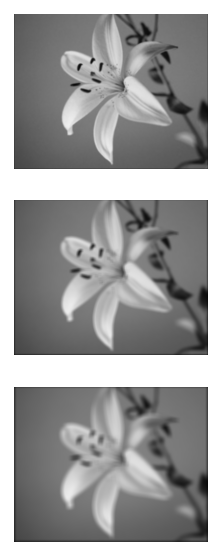

In [80]:
# Apply the mean filter with filter sizes of 3, 7, and 11
filtered_image_3 = apply_mean_filter(im_gray, 3)
filtered_image_7 = apply_mean_filter(im_gray, 7)
filtered_image_11 = apply_mean_filter(im_gray, 11)

# Display the filtered images
# cv2.imshow('Filtered Image (Filter Size = 3)', filtered_image_3)
# cv2.imshow('Filtered Image (Filter Size = 7)', filtered_image_7)
# cv2.imshow('Filtered Image (Filter Size = 11)', filtered_image_11)

images=[filtered_image_3,filtered_image_7,filtered_image_11]
# assume you have a list of images called "images"
num_images = len(images)

# create a square grid of subplots, with enough rows and columns to fit all the images
num_cols = int(num_images**0.5)
num_rows = (num_images + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols)

# loop through the images and add each one to a subplot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()

Appliquer le stride et la dilatation sans padding et pour différentes valeurs (2,5,11) et (1,3,5) respectivement.

In [82]:
def apply_filter_to_image(image: np.ndarray, 
                          kernel: List[List[float]],
                          stride: Tuple[int, int] = (1, 1),
                          dilation: Tuple[int, int] = (1, 1)) -> np.ndarray:
    """Applies filter to the given image.
    Args:
        image (np.ndarray): 3D matrix to be convolved. Shape must be in HWC format.
        kernel (List[List[float]]): 2D odd-shaped matrix (e.g. 3x3, 5x5, 13x9, etc.).
        stride (Tuple[int, int], optional): Tuple of the stride along axes. With the `(r, c)` stride we move on `r` pixels along rows and on `c` pixels along columns on each iteration. Defaults to (1, 1).
        dilation (Tuple[int, int], optional): Tuple of the dilation along axes. With the `(r, c)` dilation we distancing adjacent pixels in kernel by `r` along rows and `c` along columns. Defaults to (1, 1).
    Returns:
        np.ndarray: image after applying kernel.
    """
    kernel = np.asarray(kernel)
    b = kernel.shape
    return np.dstack([Conv2D(image[:, :, z], kernel, stride=stride, dilation=dilation, padding=(b[0]//2,  b[1]//2)) 
                      for z in range(3)]).astype('uint8')

In [83]:
def Conv2D(matrix: Union[List[List[float]], np.ndarray], 
           kernel: Union[List[List[float]], np.ndarray], 
           stride: Tuple[int, int] = (1, 1), 
           dilation: Tuple[int, int] = (1, 1), 
           padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    """Makes a 2D convolution with the kernel over matrix using defined stride, dilation and padding along axes.
    Args:
        matrix (Union[List[List[float]], np.ndarray]): 2D matrix to be convolved.
        kernel (Union[List[List[float]], np.ndarray]): 2D odd-shaped matrix (e.g. 3x3, 5x5, 13x9, etc.).
        stride (Tuple[int, int], optional): Tuple of the stride along axes. With the `(r, c)` stride we move on `r` pixels along rows and on `c` pixels along columns on each iteration. Defaults to (1, 1).
        # dilation (Tuple[int, int], optional): Tuple of the dilation along axes. With the `(r, c)` dilation we distancing adjacent pixels in kernel by `r` along rows and `c` along columns. Defaults to (1, 1).
        padding (Tuple[int, int], optional): Tuple with number of rows and columns to be padded. Defaults to (0, 0).
    Returns:
        np.ndarray: 2D Feature map, i.e. matrix after convolution.
    """
    from tools import _check_params 
    matrix, kernel, k, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    matrix_out = np.zeros((h_out, w_out))
    
    b = k[0] // 2, k[1] // 2
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    for i in range(h_out):
        center_x = center_x_0 + i * stride[0]
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        for j in range(w_out):
            center_y = center_y_0 + j * stride[1]
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]

            submatrix = matrix[indices_x, :][:, indices_y]

            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out

In [85]:
def apply_stride_and_dilation(image: np.ndarray, 
                               kernel: List[List[float]], 
                               stride: int, 
                               dilation: int) -> np.ndarray:
    """Applies stride and dilation to the given image with a kernel.
    Args:
        image (np.ndarray): 3D matrix to be convolved. Shape must be in HWC format.
        kernel (List[List[float]]): 2D odd-shaped matrix (e.g. 3x3, 5x5, 13x9, etc.).
        stride (int): the stride for the convolution operation.
        dilation (int): the dilation factor for the dilation operation.
    Returns:
        np.ndarray: image after applying stride and dilation.
    """
    kernel = np.asarray(kernel)
    b = kernel.shape
    
    # apply convolution with stride
    convolved = cv2.filter2D(image, -1, kernel, stride=stride)
    
    # apply dilation
    dilated = cv2.dilate(convolved, np.ones((dilation,dilation)), iterations=1)

Filtered image shape: (318, 396, 3)
Filtered image with stride=2 and dilation=1 shape: (159, 198, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=2 and dilation=3 shape: (157, 196, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=2 and dilation=5 shape: (155, 194, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=5 and dilation=1 shape: (64, 80, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=5 and dilation=3 shape: (63, 79, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=5 and dilation=5 shape: (62, 78, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=11 and dilation=1 shape: (29, 36, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=11 and dilation=3 shape: (29, 36, 3)
Filtered image shape: (318, 396, 3)
Filtered image with stride=11 and dilation=5 shape: (29, 36, 3)


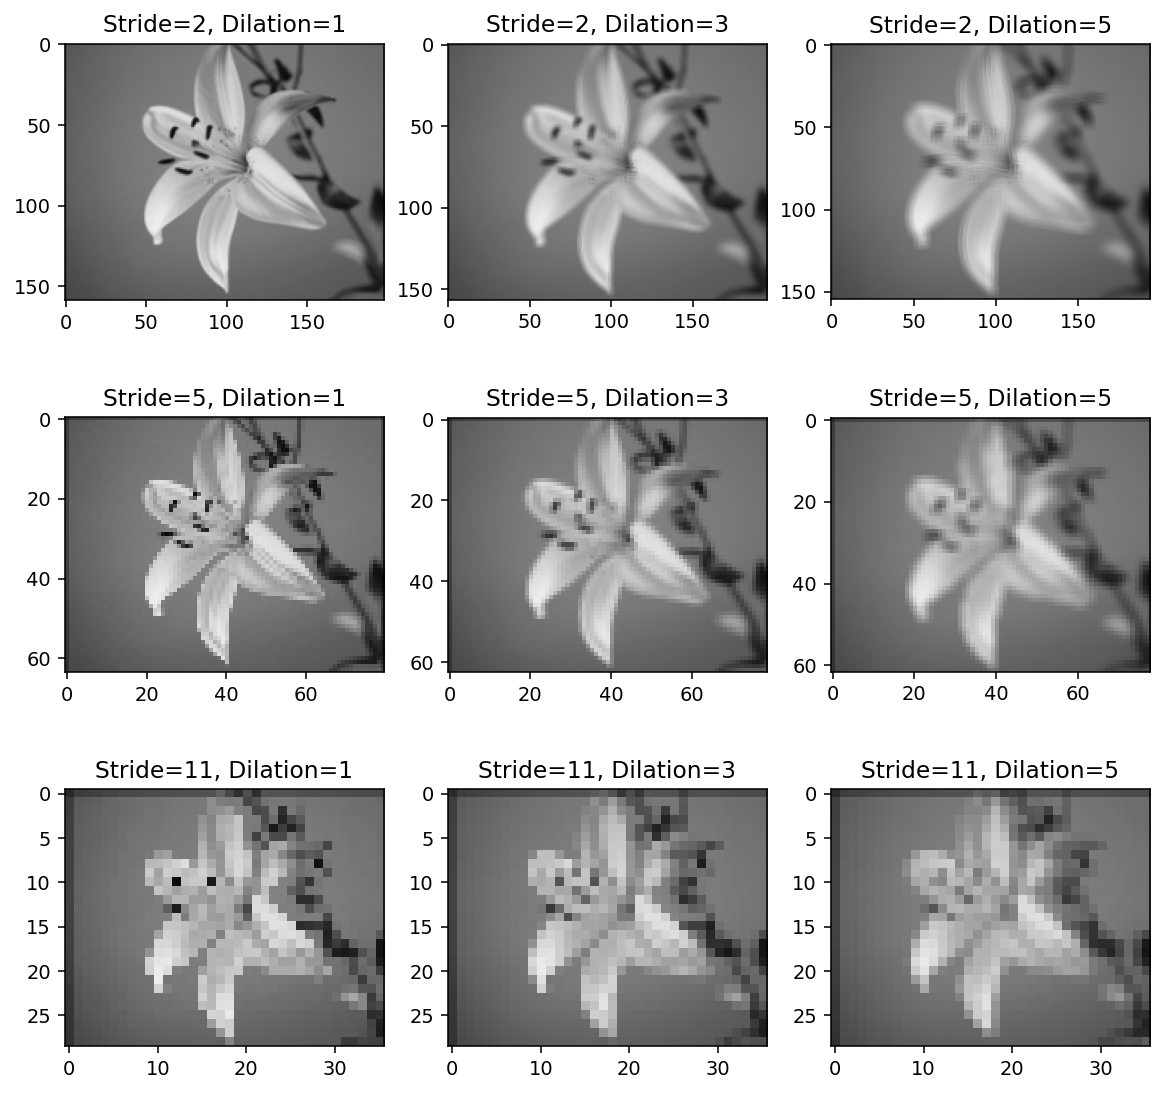

In [90]:
# Define kernel
kernel_size = 3
kernel = gaussian_mask(kernel_size)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))


# Apply filter to image with stride and dilation
for i,stride in enumerate([2, 5, 11]):
    for j,dilation in enumerate([1, 3, 5]):
        filtered_image = apply_filter_to_image(im_gray, kernel)
        filtered_image_strided_dilated = apply_filter_to_image(im_gray, kernel, stride=(stride, stride), dilation=(dilation, dilation))
        axs[i, j].imshow(filtered_image_strided_dilated, cmap='gray')
        axs[i, j].set_title(f"Stride={stride}, Dilation={dilation}")
        print(f"Filtered image shape: {filtered_image.shape}")
        print(f"Filtered image with stride={stride} and dilation={dilation} shape: {filtered_image_strided_dilated.shape}")
plt.show()


2/ Automatiser le processus précédant. Créer une fonction pour la construction du filtre moyenneur à
l’instar de la fonction gaussian_mask. Faire une fonction filter_analysis qui prend en entrée une image
et la fonction du filtre souhaité et qui renvoi la figure des comparaisons.

In [ ]:
from typing import List, Tuple, Callable

def mean_filter(size: int) -> np.ndarray:
    """Construct a mean filter of a given size.

    Args:
        size (int): The size of the filter.

    Returns:
        np.ndarray: A 2D mean filter of the given size.
    """
    return np.ones((size, size)) / (size ** 2)

def filter_analysis(image: np.ndarray, filter_func: Callable[[int], np.ndarray], filter_sizes: List[int]) -> None:
    """Apply a filter to an image for different filter sizes and plot the results.

    Args:
        image (np.ndarray): The input image.
        filter_func (Callable[[int], np.ndarray]): A function that constructs a filter of a given size.
        filter_sizes (List[int]): A list of filter sizes to use.
    """
    fig, axs = plt.subplots(nrows=1, ncols=len(filter_sizes) + 1, figsize=(15, 5))
    axs[0].imshow(image)
    axs[0].set_title('Original Image')

    for i, size in enumerate(filter_sizes):
        kernel = filter_func(size)
        filtered_image = apply_filter_to_image(image, kernel)
        axs[i + 1].imshow(filtered_image)
        axs[i + 1].set_title(f'Filtered (Size: {size})')

    plt.show()

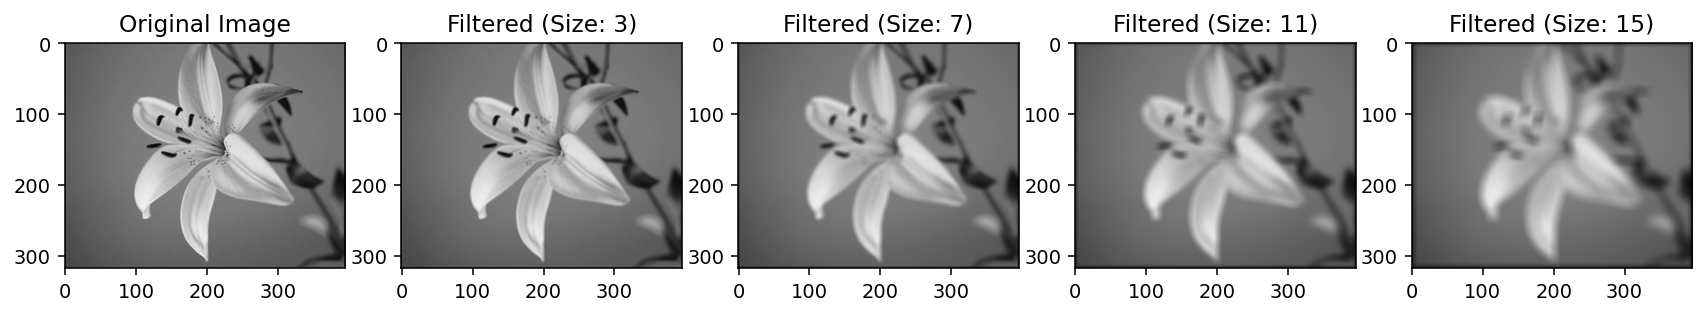

In [ ]:
# Analyser les filtres moyens de différentes tailles
filter_sizes = [3, 7, 11, 15]
filter_analysis(im_gray, mean_filter, filter_sizes)

3/ Refaire l’expérience précédente sur une image couleur.

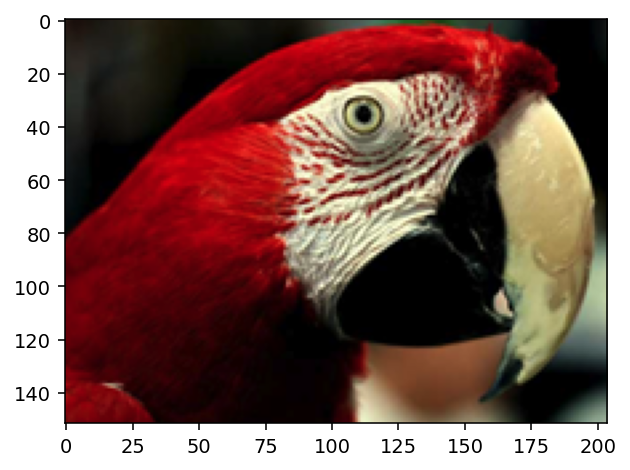

In [ ]:
im_color = cv2.imread('./figs/red_bird.png')
im_color= cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)

plt.imshow(im_color)

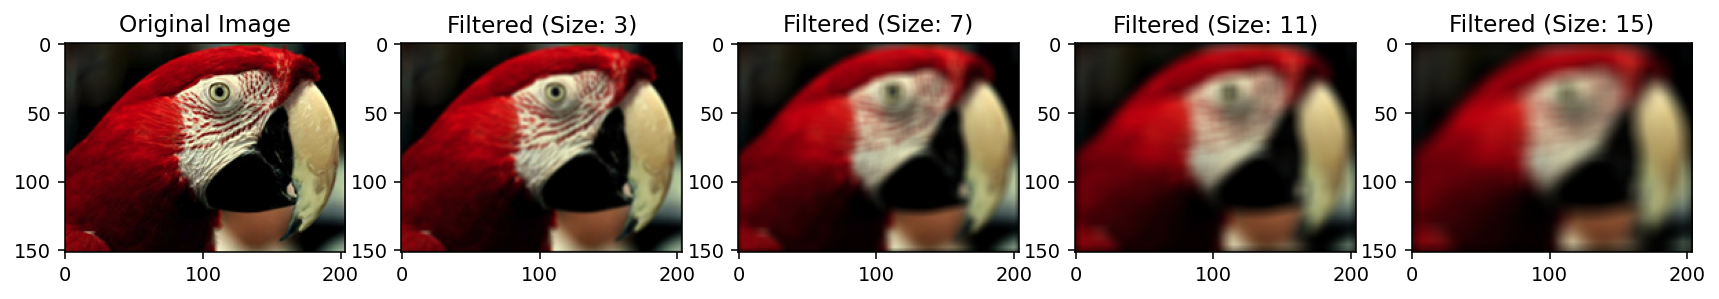

In [ ]:
# Analyser les filtres moyens de différentes tailles
filter_sizes = [3, 7, 11, 15]
filter_analysis(im_color, mean_filter, filter_sizes)

4/ Construir les fonctions permettant de calculer : Gx = I ⊛ Sx et Gy = I ⊛ Sy.

In [91]:
def get_gradient(img):
    # calculate gradients
    g_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    g_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return g_x, g_y


5/ La fonction permettant de calculer le module du gradient de l’image estimé de chaque pixel GI et leur
direction θI .

In [ ]:
def grad_mag_orient(gx, gy):
    # Calculate gradient magnitude
    mag = np.sqrt(gx**2 + gy**2)
    
    # Calculate gradient orientation
    ori = np.arctan2(gy, gx)
    
    return mag, ori

In [ ]:
g_x, g_y= get_gradient(im_gray)


In [ ]:
mag, ori= grad_mag_orient(g_x,g_y)

6/ A l’aide de la fonction grad_orientation, afficher les orientations ajustées sur les 8 directions

Text(0.5, 1.0, 'Orientations')

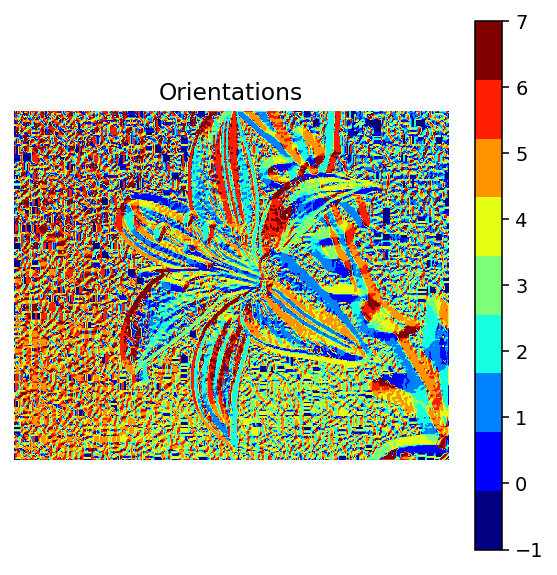

In [ ]:
bins = 8
cmap = cmap_discretize('jet', bins+1)
ori_map = grad_orientation(g_x, g_y, mag, bins)
plt.imshow(ori_map, cmap=cmap, vmin=-1, vmax=bins-1)
plt.colorbar()
plt.axis('off')
plt.title("Orientations")

7/ La fonction d’un filtre détecteur de contours du premier ordre en incluant seuillage au module du gradient de l’image calculé

In [ ]:
def edge_detection(img, threshold):
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Appliquer le filtre de Sobel pour calculer les gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calculer le module du gradient de l'image
    grad_mag = np.sqrt(sobelx**2 + sobely**2)

    # Appliquer un seuillage sur le module du gradient pour détecter les contours
    edges = np.zeros(grad_mag.shape, dtype=np.uint8)
    edges[grad_mag > threshold] = 255
    
    return edges
# La fonction prend en entrée une image en couleur et un seuil pour le module du gradient. Elle renvoie une image binaire où les pixels blancs représentent les contours détectés.







In [92]:
edge=edge_detection(im_color,0.8)

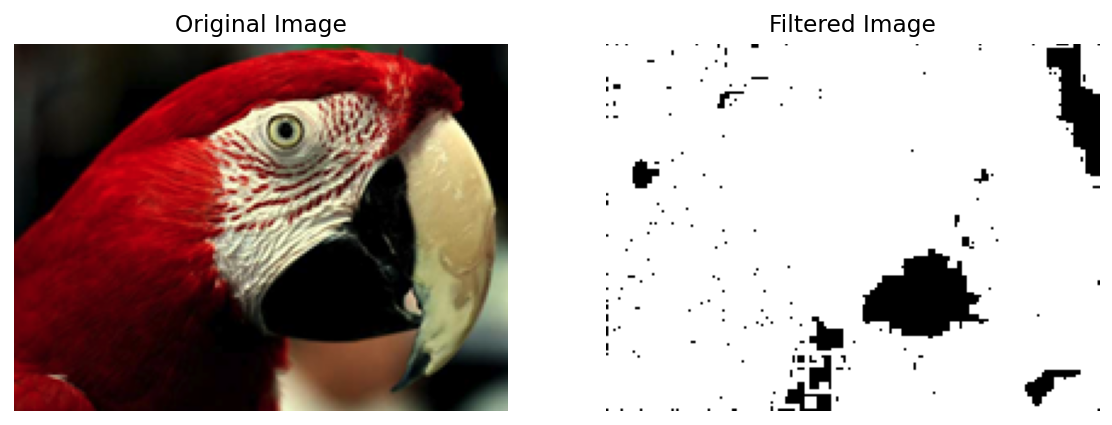

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(im_color, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(edge, cmap='gray')
ax2.set_title('Filtered Image')
ax2.axis('off')
plt.show()

8/ La fonction permettant de calculer LI = I ⊛ L.

In [103]:
def LI(img):
    # Define kernel L
    L = np.array([[0, 0, -1, 0, 0],
                [0, -1, -2, -1, 0],
                [-1, -2, 16, -2, -1],
                [0, -1, -2, -1, 0],
                [0, 0, -1, 0, 0]], dtype=np.float32)


    # Apply convolution
    LI = cv2.filter2D(img, -1, L)

    return LI

Text(0.5, 1.0, 'LI')

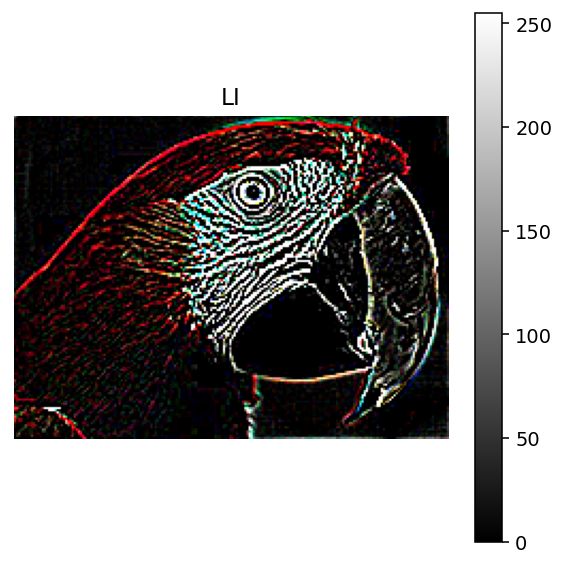

In [104]:
 # Display result
LI=LI(im_color)
plt.imshow(LI, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title("LI")

La fonction déterminant les points de contours (les passages par 0 de LI )

In [101]:
def detect_edges_LoG(img, threshold):
    # Convert image to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian smoothing
    img_smooth = cv2.GaussianBlur(img, (5,5), 0)
    
    # Apply Laplacian operator
    img_LoG = cv2.Laplacian(img_smooth, cv2.CV_64F, ksize=5)
    
    # Find zero crossings
    edges = np.zeros_like(img_LoG, dtype=np.uint8)
    height, width = img_LoG.shape[:2]
    for i in range(1, height-1):
        for j in range(1, width-1):
            neighbors = [img_LoG[i-1, j-1], img_LoG[i-1, j], img_LoG[i-1, j+1], 
                         img_LoG[i, j-1], img_LoG[i, j+1],
                         img_LoG[i+1, j-1], img_LoG[i+1, j], img_LoG[i+1, j+1]]
            if np.min(neighbors) < 0 and np.max(neighbors) > 0 and np.max(neighbors) - np.min(neighbors) > threshold:
                edges[i, j] = 255
    
    return edges

Text(0.5, 1.0, 'edges')

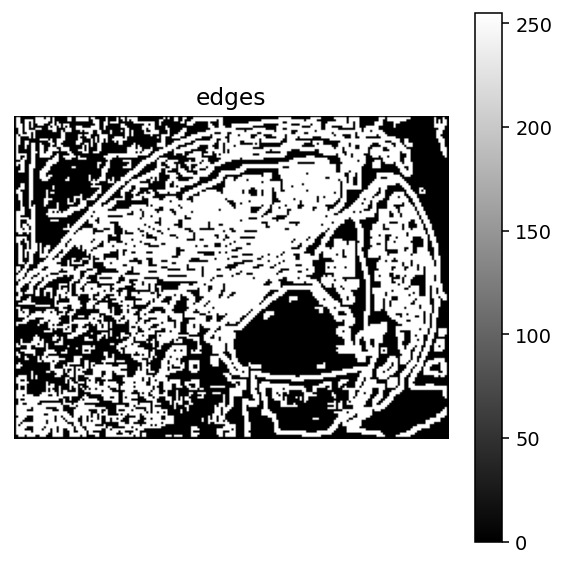

In [105]:
edges = detect_edges_LoG(im_color, 50)
plt.imshow(edges, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title("edges")

PARTIE 2 :

1/ Ecrire une fonction reproduisant le fonctionnement du NMS

In [ ]:
def non_max_suppression(g_m, g_o):
    # Conversion des angles de radians à degrés
    g_o = (g_o * 180 / np.pi) % 180
    
    # Dimensions de l'image
    w, h = g_m.shape
    
    # Initialisation de l'image INMS
    INMS = np.zeros((w, h), dtype=np.uint8)
    
    # Définition des 4 régions pour l'évaluation des non-maxima
    for i in range(1, w-1):
        for j in range(1, h-1):
            q = 255
            r = 255
            
            # Région 1 (0° - 45°)
            if (0 <= g_o[i,j] < 22.5) or (157.5 <= g_o[i,j] <= 180):
                q = g_m[i, j+1]
                r = g_m[i, j-1]
                 # Région 2 (45° - 90°)
            elif 22.5 <= g_o[i,j] < 67.5:
                q = g_m[i+1, j-1]
                r = g_m[i-1, j+1]
            # Région 3 (90° - 135°)
            elif 67.5 <= g_o[i,j] < 112.5:
                q = g_m[i+1, j]
                r = g_m[i-1, j]
            # Région 4 (135° - 180°)
            elif 112.5 <= g_o[i,j] < 157.5:
                q = g_m[i-1, j-1]
                r = g_m[i+1, j+1]
            
            # Comparaison avec les voisins
            if (g_m[i,j] >= q) and (g_m[i,j] >= r):
                INMS[i,j] = g_m[i,j]
            else:
                INMS[i,j] = 0
                
    return INMS

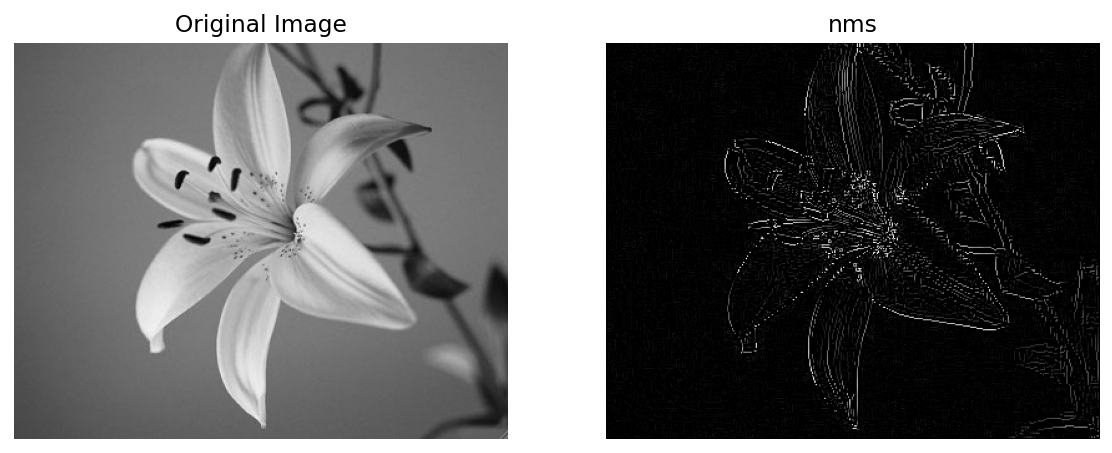

In [106]:
# Apply NMS
nms = non_max_suppression(mag, ori)

# Display results


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(im_gray, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(nms, cmap='gray')
ax2.set_title('nms')
ax2.axis('off')
plt.show()

Les images G et INMS sont toutes deux des images en niveaux de gris. La principale différence entre les deux images est que INMS a des contours plus nets que G, car les bords qui ne sont pas des bords locaux maximaux sont supprimés par la fonction NMS. Cela conduit à des contours plus précis et plus clairement définis dans l'image INMS.

3/ Effectuez un lissage de l’image avant et après suppression des non-maxima tout en variant les valeurs
de σ. Conclure sur les différentes approches tout en définissant l’influence de chaque paramètre sur les
contours générés.

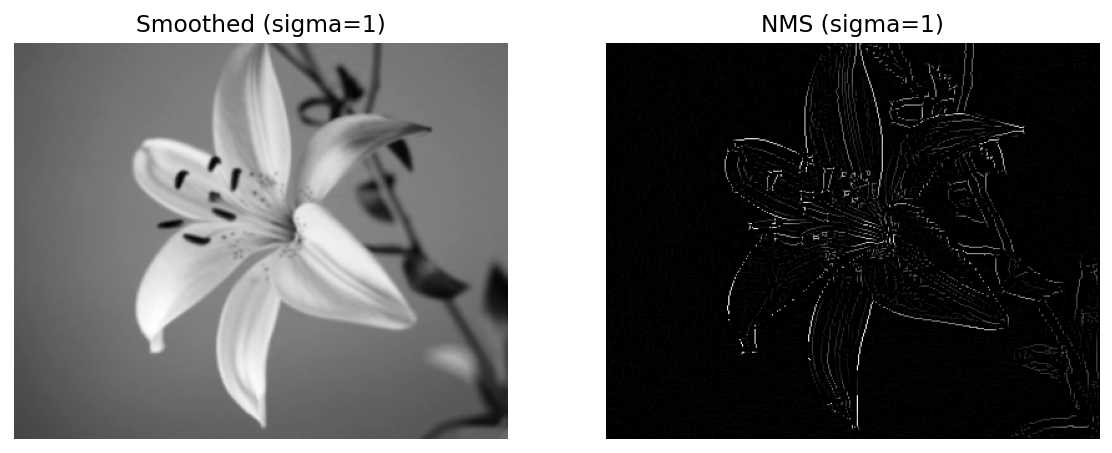

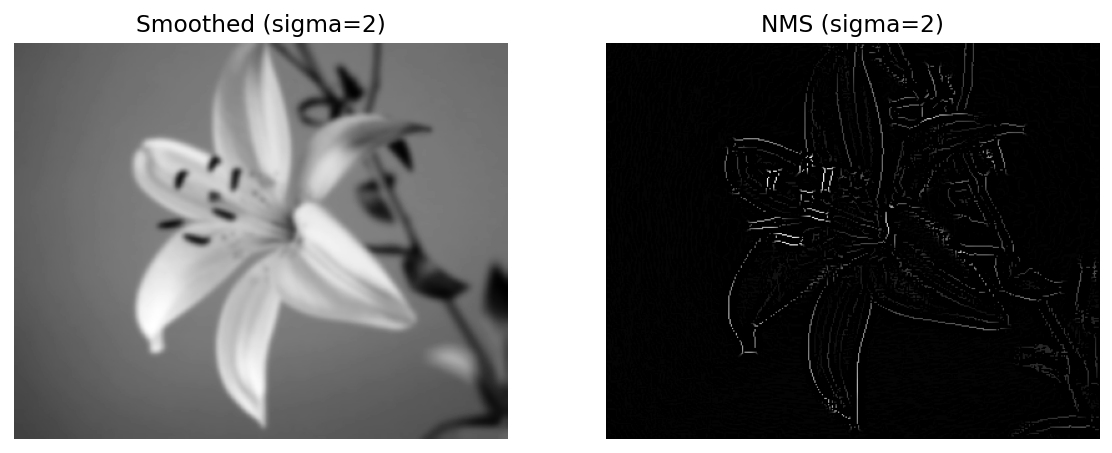

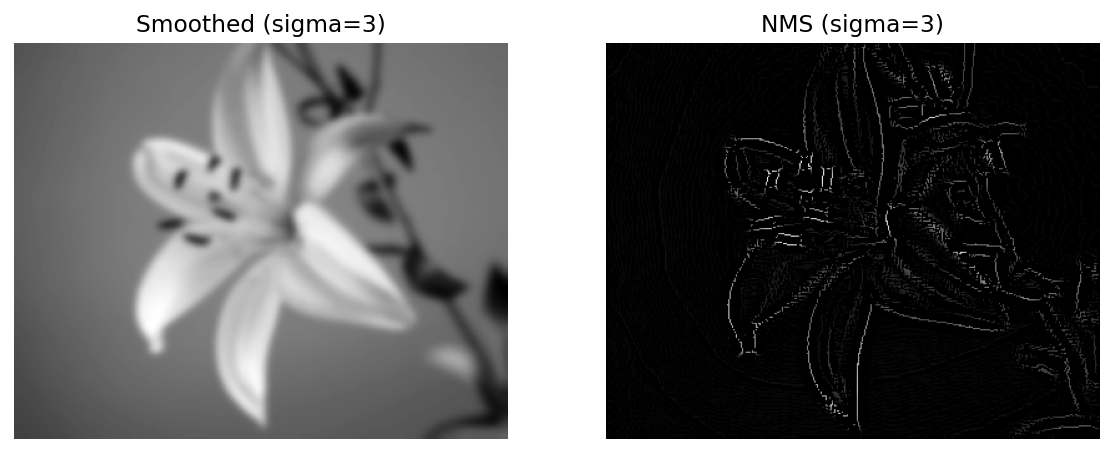

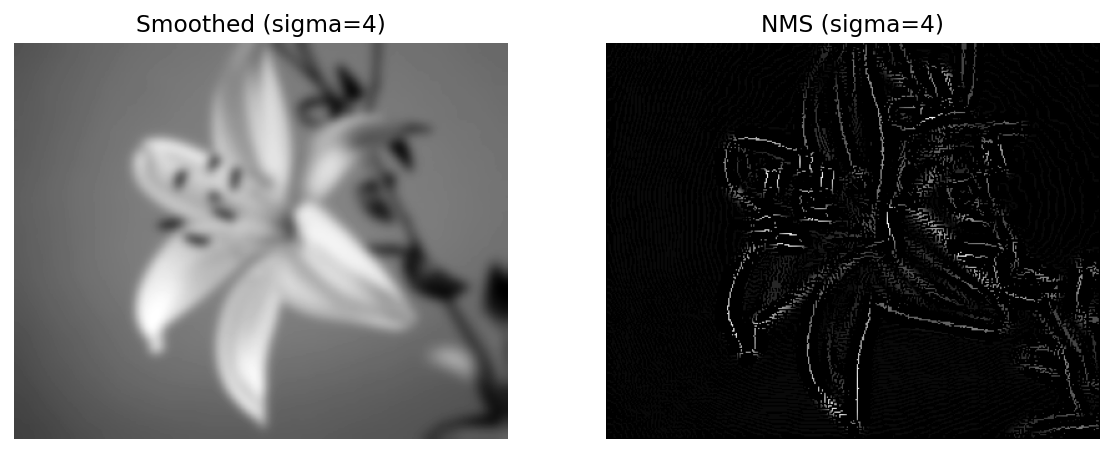

In [ ]:
from scipy import ndimage

# Define a list of sigma values for the Gaussian filter
sigma_values = [1, 2, 3, 4]

for sigma in sigma_values:
    # Smooth the grayscale image with a Gaussian filter of standard deviation sigma
    smoothed = ndimage.gaussian_filter(im_gray, sigma)
    
    # Compute the gradient magnitude and orientation
    g_x, g_y = get_gradient(smoothed)
    g_m, g_o = grad_mag_orient(g_x, g_y)
    
    # Perform non-maximum suppression
    g_m_nms = non_max_suppression(g_m, g_o)
    
    # Display the smoothed image and the NMS result
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(smoothed, cmap='gray')
    plt.title('Smoothed (sigma={})'.format(sigma))
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(g_m_nms, cmap='gray')
    plt.title('NMS (sigma={})'.format(sigma))
    plt.axis('off')
    
    plt.show()

En ce qui concerne la détection de contours à partir de gradients, l'utilisation d'un filtre dérivatif du premier ordre est simple et rapide, mais peut être sensible au bruit. L'utilisation d'un filtre dérivatif du deuxième ordre peut améliorer la précision de la détection, mais peut également introduire des artefacts.

Le seuillage du gradient permet de détecter les pixels ayant une forte variation d'intensité, mais peut également manquer des contours plus faibles. Le choix du seuil dépendra donc de l'application et des contours recherchés.

La suppression des non-maxima permet de réduire les faux positifs en ne gardant que les pixels ayant une intensité maximale dans leur direction de gradient. Cependant, cela peut également entraîner une perte de certains contours, en particulier pour des contours ayant des orientations différentes de celles des régions testées.

Le lissage de l'image avant la détection des contours, cela permet de réduire le bruit et d'améliorer la précision de la détection. Cependant, un lissage excessif peut également atténuer les contours et réduire la précision de la détection.

Enfin, le choix de la taille de la fenêtre de lissage (définie par le paramètre sigma) dépendra de la taille des détails que l'on souhaite détecter dans l'image. Des valeurs plus élevées de sigma permettront de lisser des structures plus grandes, tandis que des valeurs plus faibles permettront de détecter des détails plus fins. Cependant, l'utilisation de valeurs de sigma trop faibles peut également augmenter le bruit et la sensibilité aux variations locales d'intensité.

le choix des paramètres dépendra des besoins spécifiques de chaque application, et il peut être nécessaire de tester différentes combinaisons de paramètres pour obtenir les meilleurs résultats de détection de contours.
